In [139]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from collections import Counter

### Obtaining all Names (Wikia)

In [113]:
#urlnames = "https://game8.co/games/Genshin-Impact/archives/296707"

#Web scraping the wikia for Genshin's playable character list.

urlnames_wk = "https://genshin-impact.fandom.com/wiki/Category:Playable_Characters"

pagenames_wk = requests.get(urlnames_wk)

soupname_wk = BeautifulSoup(pagenames_wk.text, "html.parser")

In [114]:
#Scraping through to get the html, identifying which class and identifier to find the names

imgtag_wk = soupname_wk.find_all("a", class_="category-page__member-link")
#imgtag

In [116]:
#Converting the soup into a usable List

type(imgtag_wk)

titles = [tag['title'] for tag in imgtag_wk]
characters_wk = titles[6:]

#Replacing spaces with underscores for it to be usable in iterating through the wikia pages

converter = lambda x: x.replace(' ', '_')
characters_wk = list(map(converter, characters_wk))
characters_wk = sorted(characters_wk)


remove = ["Lumine", "Traveler_(Unaligned)", "Traveler"]    #These characters are extras
characters_wk = [item for item in characters_wk if item not in remove]

print(characters_wk)

['Albedo', 'Alhaitham', 'Aloy', 'Amber', 'Arataki_Itto', 'Baizhu', 'Barbara', 'Beidou', 'Bennett', 'Candace', 'Charlotte', 'Chevreuse', 'Chiori', 'Chongyun', 'Collei', 'Cyno', 'Dehya', 'Diluc', 'Diona', 'Dori', 'Eula', 'Faruzan', 'Fischl', 'Freminet', 'Furina', 'Gaming', 'Ganyu', 'Gorou', 'Hu_Tao', 'Jean', 'Kaedehara_Kazuha', 'Kaeya', 'Kamisato_Ayaka', 'Kamisato_Ayato', 'Kaveh', 'Keqing', 'Kirara', 'Klee', 'Kujou_Sara', 'Kuki_Shinobu', 'Layla', 'Lisa', 'Lynette', 'Lyney', 'Mika', 'Mona', 'Nahida', 'Navia', 'Neuvillette', 'Nilou', 'Ningguang', 'Noelle', 'Qiqi', 'Raiden_Shogun', 'Razor', 'Rosaria', 'Sangonomiya_Kokomi', 'Sayu', 'Shenhe', 'Shikanoin_Heizou', 'Sucrose', 'Tartaglia', 'Thoma', 'Tighnari', 'Traveler_(Anemo)', 'Traveler_(Dendro)', 'Traveler_(Electro)', 'Traveler_(Geo)', 'Traveler_(Hydro)', 'Venti', 'Wanderer', 'Wriothesley', 'Xiangling', 'Xianyun', 'Xiao', 'Xingqiu', 'Xinyan', 'Yae_Miko', 'Yanfei', 'Yaoyao', 'Yelan', 'Yoimiya', 'Yun_Jin', 'Zhongli']


### Obtaining All Names (gg)

In [117]:
#Web scraping the wikia for Genshin's playable character list.

urlnames_gg = "https://genshin.gg/"

pagenames_gg = requests.get(urlnames_gg)

soupname_gg = BeautifulSoup(pagenames_gg.text, "html.parser")

In [118]:
#Scraping through to get the html, identifying which class and identifier to find the names

imgtag_gg = soupname_gg.find_all("h2", class_= "character-name")
#imgtag_gg

In [119]:
characters_gg = [element.get_text() for element in imgtag_gg]
#characters

def process_names(names_list):
    return [name.replace(" ", "").lower() for name in names_list]

characters_gg = process_names(characters_gg)
characters_gg = sorted(characters_gg)

print(characters_gg)

['albedo', 'alhaitham', 'aloy', 'amber', 'ayaka', 'ayato', 'baizhu', 'barbara', 'beidou', 'bennett', 'candace', 'charlotte', 'chevreuse', 'childe', 'chiori', 'chongyun', 'collei', 'cyno', 'dehya', 'diluc', 'diona', 'dori', 'eula', 'faruzan', 'fischl', 'freminet', 'furina', 'gaming', 'ganyu', 'gorou', 'heizou', 'hutao', 'itto', 'jean', 'kaeya', 'kaveh', 'kazuha', 'keqing', 'kirara', 'klee', 'kokomi', 'kukishinobu', 'layla', 'lisa', 'lynette', 'lyney', 'mika', 'mona', 'nahida', 'navia', 'neuvillette', 'nilou', 'ningguang', 'noelle', 'qiqi', 'raiden', 'razor', 'rosaria', 'sara', 'sayu', 'shenhe', 'sucrose', 'thoma', 'tighnari', 'traveler(anemo)', 'traveler(dendro)', 'traveler(electro)', 'traveler(geo)', 'traveler(hydro)', 'venti', 'wanderer', 'wriothesley', 'xiangling', 'xianyun', 'xiao', 'xingqiu', 'xinyan', 'yaemiko', 'yanfei', 'yaoyao', 'yelan', 'yoimiya', 'yunjin', 'zhongli']


### Tidying Up Names

In [41]:
#len(characters_wk)
#len(characters_gg)

#[characters_gg, characters_wk]
#names = arr(characters_gg & characters_wk)
#names

In [42]:
#print(characters_gg)

In [43]:
#print(characters_wk)

In [120]:
remove_wk = ["Arataki_Itto", "Kaedehara_Kazuha", "Shikanoin_Heizou", "Kujou_Sara", "Tartaglia",
         "Kamisato_Ayato", "Kamisato_Ayaka", "Sangonomiya_Kokomi"]
remove_gg = ["itto", "kazuha", "heizou", "sara", "childe", "ayato", "ayaka", "kokomi"]

characters_wk = [item for item in characters_wk if item not in remove_wk]
characters_wk = characters_wk + remove_wk
print(characters_wk)

characters_gg = [item for item in characters_gg if item not in remove_gg]
characters_gg = characters_gg + remove_gg
print(characters_gg)

['Albedo', 'Alhaitham', 'Aloy', 'Amber', 'Baizhu', 'Barbara', 'Beidou', 'Bennett', 'Candace', 'Charlotte', 'Chevreuse', 'Chiori', 'Chongyun', 'Collei', 'Cyno', 'Dehya', 'Diluc', 'Diona', 'Dori', 'Eula', 'Faruzan', 'Fischl', 'Freminet', 'Furina', 'Gaming', 'Ganyu', 'Gorou', 'Hu_Tao', 'Jean', 'Kaeya', 'Kaveh', 'Keqing', 'Kirara', 'Klee', 'Kuki_Shinobu', 'Layla', 'Lisa', 'Lynette', 'Lyney', 'Mika', 'Mona', 'Nahida', 'Navia', 'Neuvillette', 'Nilou', 'Ningguang', 'Noelle', 'Qiqi', 'Raiden_Shogun', 'Razor', 'Rosaria', 'Sayu', 'Shenhe', 'Sucrose', 'Thoma', 'Tighnari', 'Traveler_(Anemo)', 'Traveler_(Dendro)', 'Traveler_(Electro)', 'Traveler_(Geo)', 'Traveler_(Hydro)', 'Venti', 'Wanderer', 'Wriothesley', 'Xiangling', 'Xianyun', 'Xiao', 'Xingqiu', 'Xinyan', 'Yae_Miko', 'Yanfei', 'Yaoyao', 'Yelan', 'Yoimiya', 'Yun_Jin', 'Zhongli', 'Arataki_Itto', 'Kaedehara_Kazuha', 'Shikanoin_Heizou', 'Kujou_Sara', 'Tartaglia', 'Kamisato_Ayato', 'Kamisato_Ayaka', 'Sangonomiya_Kokomi']
['albedo', 'alhaitham', 'al

In [14]:
#for i in range(50,80):
#    print(characters_gg2[i])
#    print(characters_wk2[i])

### Scraping Constellation Data

In [100]:
#Web Scraping Constellation Data from Genshin.gg - Complete

characters_gg_test = characters_gg[2:5]
cons_full = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full.append(notext)

In [101]:
cons_full

['This character has no constellations.',
 "Fires 2 arrows per Aimed Shot. The second arrow deals 20% of the first arrow's DMG. Baron Bunny, new and improved! Hitting Baron Bunny's foot with a fully-charged Aimed Shot manually detonates it. Explosion via manual detonation deals 200% additional DMG. Increases the Level of Fiery Rain by 3. Maximum upgrade level is 15. Decreases Explosive Puppet's CD by 20%. Adds 1 additional charge. Increase the Level of Explosive Puppet by 3. Maximum upgrade level is 15. Fiery Rain increases Amber's Movement SPD by 15% and Base ATK by 15% for 10s.",
 "When Kamisato Ayaka's Normal or Charged Attacks deal Cryo DMG to opponents, it has a 50% chance of decreasing the CD of Kamisato Art: Hyouka by 0.3s. This effect can occur once every 0.1s. When casting Kamisato Art: Soumetsu, unleashes 2 smaller additional Frostflake Seki no To, each dealing 20% of the original storm's DMG. Increases the Level of Kamisato Art: Soumetsu by 3. Maximum upgrade level is 15. Op

### Scraping Dates Data

In [95]:
#Obtaining the release date of the Character

characters_wk_test = characters_wk[74:83]
dates_full = []

for names in characters_wk_test:

    url_chara_wk = "https://genshin-impact.fandom.com/wiki/"+names
    page_chara_wk = requests.get(url_chara_wk)
    soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")
    
    
    release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
    #print(type(release_date_div))
    
    output = release_date_div.find('div', class_='pi-data-value').get_text(strip=True).split()[0:3]
    output[2] = output[2][:4]
    
    output = ' '.join(output)
    output = datetime.strptime(output, "%B %d, %Y").date()
    
    dates_full.append(output)


In [96]:
#dates_full

### Combining the Functions

In [196]:
characters_wk_test = characters_wk#[0:15]
characters_gg_test = characters_gg#[0:15]
cons_full = []
dates_full = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full.append(notext)
        
        
for names in characters_wk_test:

    url_chara_wk = "https://genshin-impact.fandom.com/wiki/"+names
    page_chara_wk = requests.get(url_chara_wk)
    soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")
    
    
    release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
    
    output = release_date_div.find('div', class_='pi-data-value').get_text(strip=True).split()[0:3]
    output[2] = output[2][:4]
    
    output = ' '.join(output)
    output = datetime.strptime(output, "%B %d, %Y").date()
    
    dates_full.append(output)
    
#pairs = zip(dates_full, cons_full)
#my_dict = dict(pairs)
#my_dict

In [197]:
#len(my_dict)

In [202]:
#Check Length of data

print(len(cons_full))
print(len(dates_full))

84
84


In [207]:
cons_full
dates_full

#matched_dict = {date: paragraph for date, paragraph in zip(dates_full, cons_full)}
#len(matched_dict)

combined_list = list(zip(dates_full, cons_full))
combined_list

[(datetime.date(2020, 12, 23),
  "Transient Blossoms generated by Albedo's Abiogenesis: Solar Isotoma regenerate 1.2 Energy for Albedo. Transient Blossoms generated by Abiogenesis: Solar Isotoma grant Albedo Fatal Reckoning for 30s: Each stack of Fatal Reckoning increases DMG by of Albedo's DEF. The effect stacks up to 4 times. Unleashing Rite of Progeniture: Tectonic Tide consumes all stacks of Fatal Reckoning, increasing the DMG dealt by the Tectonic Tide and Fatal Blossoms based on the number of stacks consumed. Increases the level of Abiogenesis: Solar Isotoma by 3. Maximum upgrade level is 15. Solar Isotoma increases Plunging Attack DMG by 30% for active party members within the AoE. Increases the level of Rite of Progeniture: Tectonic Tide by 3. Maximum upgrade level is 15. If active party members within the AoE are protected by a shield created by Crystallize, Solar Isotoma increases their DMG by 17%."),
 (datetime.date(2023, 1, 18),
  "When a Projection Attack hits an opponent,

In [211]:
#Check Length of dictionary

len(combined_list)
type(combined_list)

list

In [214]:
cons_full

["Transient Blossoms generated by Albedo's Abiogenesis: Solar Isotoma regenerate 1.2 Energy for Albedo. Transient Blossoms generated by Abiogenesis: Solar Isotoma grant Albedo Fatal Reckoning for 30s: Each stack of Fatal Reckoning increases DMG by of Albedo's DEF. The effect stacks up to 4 times. Unleashing Rite of Progeniture: Tectonic Tide consumes all stacks of Fatal Reckoning, increasing the DMG dealt by the Tectonic Tide and Fatal Blossoms based on the number of stacks consumed. Increases the level of Abiogenesis: Solar Isotoma by 3. Maximum upgrade level is 15. Solar Isotoma increases Plunging Attack DMG by 30% for active party members within the AoE. Increases the level of Rite of Progeniture: Tectonic Tide by 3. Maximum upgrade level is 15. If active party members within the AoE are protected by a shield created by Crystallize, Solar Isotoma increases their DMG by 17%.",
 "When a Projection Attack hits an opponent, Universality: An Elaboration on Form's CD is decreased by 1.2s.

In [216]:
List_count = []

for paragraph in cons_full:
    words = paragraph.split()
    word_count = sum(Counter(words).values())
    List_count.append(word_count)

print(List_count)
len(List_count)

[141, 252, 5, 92, 167, 117, 86, 111, 143, 196, 224, 303, 142, 205, 255, 242, 139, 136, 160, 121, 180, 129, 123, 338, 116, 146, 193, 188, 110, 120, 121, 137, 219, 125, 145, 230, 106, 100, 149, 172, 165, 234, 240, 236, 183, 66, 112, 102, 171, 116, 96, 193, 135, 108, 110, 149, 80, 126, 123, 124, 180, 119, 271, 358, 93, 263, 106, 111, 109, 106, 102, 201, 155, 135, 84, 106, 164, 149, 155, 111, 143, 121, 138, 175]


84

In [219]:
combined_list2 = list(zip(dates_full, List_count))
#combined_list2

In [221]:
word_count_dict = dict([(date, count) for date, count in combined_list2])
word_count_dict

{datetime.date(2020, 12, 23): 141,
 datetime.date(2023, 1, 18): 201,
 datetime.date(2021, 9, 1): 111,
 datetime.date(2020, 9, 28): 111,
 datetime.date(2023, 5, 2): 121,
 datetime.date(2022, 9, 28): 255,
 datetime.date(2023, 11, 8): 338,
 datetime.date(2024, 1, 9): 224,
 datetime.date(2024, 3, 13): 303,
 datetime.date(2022, 8, 24): 149,
 datetime.date(2023, 3, 1): 242,
 datetime.date(2020, 11, 11): 143,
 datetime.date(2022, 9, 9): 160,
 datetime.date(2021, 5, 18): 121,
 datetime.date(2022, 12, 7): 271,
 datetime.date(2023, 9, 5): 123,
 datetime.date(2024, 1, 31): 263,
 datetime.date(2021, 1, 12): 146,
 datetime.date(2021, 12, 14): 164,
 datetime.date(2021, 3, 2): 188,
 datetime.date(2023, 5, 24): 219,
 datetime.date(2020, 10, 20): 125,
 datetime.date(2022, 6, 21): 145,
 datetime.date(2022, 11, 18): 230,
 datetime.date(2023, 8, 16): 180,
 datetime.date(2023, 3, 21): 172,
 datetime.date(2022, 11, 2): 234,
 datetime.date(2023, 12, 20): 240,
 datetime.date(2023, 9, 27): 236,
 datetime.date(

# Testing

In [ ]:
characters_wk_test = characters_wk[3]
dates_full = []

for names in characters_wk_test:

    url_chara_wk = "https://genshin-impact.fandom.com/wiki/"+names
    page_chara_wk = requests.get(url_chara_wk)
    soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")
    
    release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
    print(release_date_div)

In [ ]:
url_chara_wk = "https://genshin-impact.fandom.com/wiki/"+characters_wk[74]
page_chara_wk = requests.get(url_chara_wk)
soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")

release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
release_date_div

In [154]:
characters_wk[3]

'Amber'

In [171]:
url_chara_wk = "https://genshin-impact.fandom.com/wiki/amber"    #+characters_wk[3]
page_chara_wk = requests.get(url_chara_wk)
soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")

In [172]:
release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
release_date_div

<div class="pi-item pi-data pi-item-spacing pi-border-color" data-source="releaseDate">
<h3 class="pi-data-label pi-secondary-font"><a href="/wiki/Character/List#Characters_by_Release_Date" title="Character/List">Release Date</a></h3>
<div class="pi-data-value pi-font">September 28, 2020<br/>3 years, 6 months ago</div>
</div>

In [176]:
output = release_date_div.find('div', class_='pi-data-value').get_text(strip=True).split()[0:3]
output[2] = output[2][:4]

output = ' '.join(output)
output = datetime.strptime(output, "%B %d, %Y").date()

output

datetime.date(2020, 9, 28)

In [168]:
url_chara_gg = "https://genshin.gg/characters/"+characters_gg[3]+"/"
page_chara_gg = requests.get(url_chara_gg)
soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")

In [169]:
cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
cons2 = [con.get_text() for con in cons1]
cons2 = " ".join(cons2)
        #print(cons2)
        #cons_full.append(cons2)
    

        #print("No Constellations")
        #notext = "This character has no constellations."
        #cons_full.append(notext)
 
cons2

"Fires 2 arrows per Aimed Shot. The second arrow deals 20% of the first arrow's DMG. Baron Bunny, new and improved! Hitting Baron Bunny's foot with a fully-charged Aimed Shot manually detonates it. Explosion via manual detonation deals 200% additional DMG. Increases the Level of Fiery Rain by 3. Maximum upgrade level is 15. Decreases Explosive Puppet's CD by 20%. Adds 1 additional charge. Increase the Level of Explosive Puppet by 3. Maximum upgrade level is 15. Fiery Rain increases Amber's Movement SPD by 15% and Base ATK by 15% for 10s."

In [181]:
#pairs = zip(output, cons2)
#my_dict_test1 = dict(pairs)
#my_dict_test1

#dict(pairs)

dict_test = {output: cons2}
dict_test

{datetime.date(2020, 9, 28): "Fires 2 arrows per Aimed Shot. The second arrow deals 20% of the first arrow's DMG. Baron Bunny, new and improved! Hitting Baron Bunny's foot with a fully-charged Aimed Shot manually detonates it. Explosion via manual detonation deals 200% additional DMG. Increases the Level of Fiery Rain by 3. Maximum upgrade level is 15. Decreases Explosive Puppet's CD by 20%. Adds 1 additional charge. Increase the Level of Explosive Puppet by 3. Maximum upgrade level is 15. Fiery Rain increases Amber's Movement SPD by 15% and Base ATK by 15% for 10s."}

In [191]:
characters_wk_test = characters_wk[0:15]
characters_gg_test = characters_gg[0:15]
cons_full_test = []
dates_full_test = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full_test.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full_test.append(notext)
        
        
for names in characters_wk_test:

    url_chara_wk = "https://genshin-impact.fandom.com/wiki/"+names
    page_chara_wk = requests.get(url_chara_wk)
    soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")
    
    
    release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
    
    output = release_date_div.find('div', class_='pi-data-value').get_text(strip=True).split()[0:3]
    output[2] = output[2][:4]
    
    output = ' '.join(output)
    output = datetime.strptime(output, "%B %d, %Y").date()
    
    dates_full_test.append(output)
    
#pairs = zip(dates_full, cons_full)
#my_dict_test = dict(pairs)

In [187]:
#my_dict_test = {tuple(dates_full): dates_full, tuple(cons_full): dates_full}
#len(my_dict_test)

#my_dict_test

In [192]:
print(dates_full_test)
print(cons_full_test)

[datetime.date(2020, 12, 23), datetime.date(2023, 1, 18), datetime.date(2021, 9, 1), datetime.date(2020, 9, 28), datetime.date(2023, 5, 2), datetime.date(2020, 9, 28), datetime.date(2020, 9, 28), datetime.date(2020, 9, 28), datetime.date(2022, 9, 28), datetime.date(2023, 11, 8), datetime.date(2024, 1, 9), datetime.date(2024, 3, 13), datetime.date(2020, 9, 28), datetime.date(2022, 8, 24), datetime.date(2022, 9, 28)]
["Transient Blossoms generated by Albedo's Abiogenesis: Solar Isotoma regenerate 1.2 Energy for Albedo. Transient Blossoms generated by Abiogenesis: Solar Isotoma grant Albedo Fatal Reckoning for 30s: Each stack of Fatal Reckoning increases DMG by of Albedo's DEF. The effect stacks up to 4 times. Unleashing Rite of Progeniture: Tectonic Tide consumes all stacks of Fatal Reckoning, increasing the DMG dealt by the Tectonic Tide and Fatal Blossoms based on the number of stacks consumed. Increases the level of Abiogenesis: Solar Isotoma by 3. Maximum upgrade level is 15. Solar I

In [195]:
len(cons_full_test)

15

In [193]:
#my_dict_test

print(characters_gg)

['albedo', 'alhaitham', 'aloy', 'amber', 'baizhu', 'barbara', 'beidou', 'bennett', 'candace', 'charlotte', 'chevreuse', 'chiori', 'chongyun', 'collei', 'cyno', 'dehya', 'diluc', 'diona', 'dori', 'eula', 'faruzan', 'fischl', 'freminet', 'furina', 'gaming', 'ganyu', 'gorou', 'hutao', 'jean', 'kaeya', 'kaveh', 'keqing', 'kirara', 'klee', 'kukishinobu', 'layla', 'lisa', 'lynette', 'lyney', 'mika', 'mona', 'nahida', 'navia', 'neuvillette', 'nilou', 'ningguang', 'noelle', 'qiqi', 'raiden', 'razor', 'rosaria', 'sayu', 'shenhe', 'sucrose', 'thoma', 'tighnari', 'traveler(anemo)', 'traveler(dendro)', 'traveler(electro)', 'traveler(geo)', 'traveler(hydro)', 'venti', 'wanderer', 'wriothesley', 'xiangling', 'xianyun', 'xiao', 'xingqiu', 'xinyan', 'yaemiko', 'yanfei', 'yaoyao', 'yelan', 'yoimiya', 'yunjin', 'zhongli', 'itto', 'kazuha', 'heizou', 'sara', 'childe', 'ayato', 'ayaka', 'kokomi']


# Data Insights

In [137]:
#The increase in constellation descriptions over time.

In [210]:
word_count_dict = {}

for date, description in my_dict.items():
    word_count = len(description.split())
    word_count_dict[date] = word_count

print(word_count_dict)

{datetime.date(2020, 12, 23): 141, datetime.date(2023, 1, 18): 201, datetime.date(2021, 9, 1): 111, datetime.date(2020, 9, 28): 111, datetime.date(2023, 5, 2): 121, datetime.date(2022, 9, 28): 255, datetime.date(2023, 11, 8): 338, datetime.date(2024, 1, 9): 224, datetime.date(2024, 3, 13): 303, datetime.date(2022, 8, 24): 149, datetime.date(2023, 3, 1): 242, datetime.date(2020, 11, 11): 143, datetime.date(2022, 9, 9): 160, datetime.date(2021, 5, 18): 121, datetime.date(2022, 12, 7): 271, datetime.date(2023, 9, 5): 123, datetime.date(2024, 1, 31): 263, datetime.date(2021, 1, 12): 146, datetime.date(2021, 12, 14): 164, datetime.date(2021, 3, 2): 188, datetime.date(2023, 5, 24): 219, datetime.date(2020, 10, 20): 125, datetime.date(2022, 6, 21): 145, datetime.date(2022, 11, 18): 230, datetime.date(2023, 8, 16): 180, datetime.date(2023, 3, 21): 172, datetime.date(2022, 11, 2): 234, datetime.date(2023, 12, 20): 240, datetime.date(2023, 9, 27): 236, datetime.date(2022, 10, 14): 183, datetime.

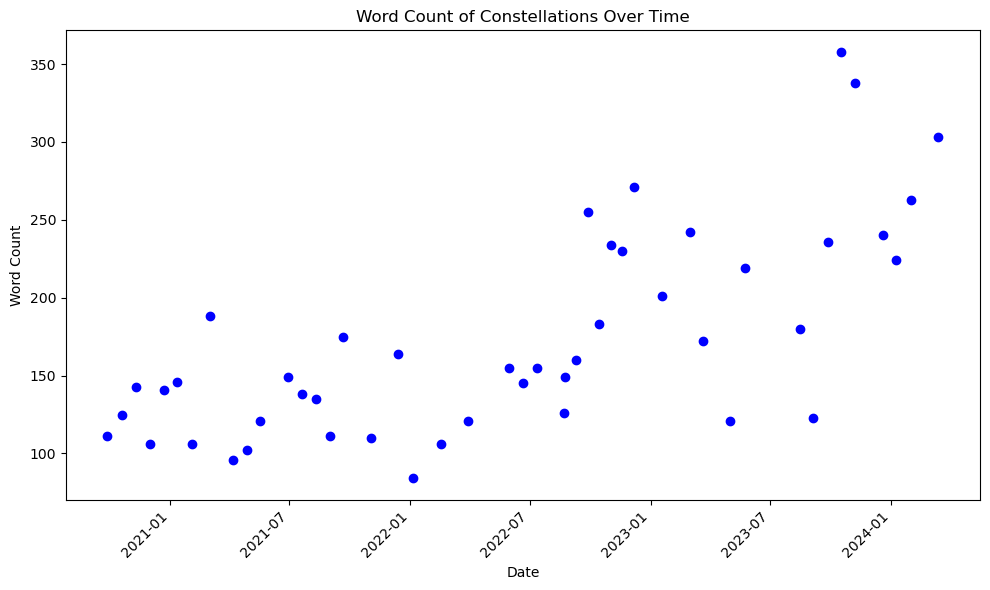

In [222]:
# Extracting the x and y data
dates = list(word_count_dict.keys())
word_counts = list(word_count_dict.values())

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dates, word_counts, color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Word Count of Constellations Over Time')

# Formatting x-axis ticks as dates
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()